
```
# # Mohammad Hosein Jafari
# git: https://github.com/MohammadHoseinJafari
# github repository for my Tasks : https://github.com/MohammadHoseinJafari/TextSpeach

```



# Pandas Assignment

In this notebook, you'll have a tour on the basics of Pandas library, the de facto standard tool of data analysis.

Let's get started!

## 1 - Packages
Let's first import all the packages that you will need during this assignment.

- ```numpy```, the fundamental package for scientific computing with Python
- ```pandas```, the main tool to deal with tabular datasets
- ```matplotlib```, ```seaborn``` and ```plotly```, libraries to plot graphs in Python
- ```missingno```, missing data visualization module for Python
- ```pycountry_convert```, a module of conversion functions between ISO country names, country-codes, and continent names
- ```warnings```, whichi supplies several exception classes that represent warnings

In [ ]:
!pip install -q pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 69.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 16.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings

import plotly.express as px

from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3, country_alpha3_to_country_alpha2

warnings.filterwarnings('ignore')
%matplotlib notebook
%matplotlib inline

## 2 - Dataset

You'll use [**Book-Crossing Dataset**](http://www2.informatik.uni-freiburg.de/~cziegler/BX/), a dataset collected in a 4-week crawl from the Book-Crossing community and usually used for recommendation algorithms.

First, download and extract the dataset using the following commands:

In [ ]:
!wget http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip

--2023-07-16 19:20:53--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV-Dump.zip’

BX-CSV-Dump.zip     100%[===================>]  24.88M  10.8MB/s    in 2.3s    

2023-07-16 19:20:56 (10.8 MB/s) - ‘BX-CSV-Dump.zip’ saved [26085508/26085508]



In [ ]:
!unzip "/content/BX-CSV-Dump.zip"

Archive:  /content/BX-CSV-Dump.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


## 3 - Data Preprocessing

Next, you should read the ```BX-Users.csv``` file of the dataset with Pandas methods and investigate its dimensions:

In [ ]:
# GRADED CELL

users_data_dir = "/content/BX-Users.csv"


df = pd.read_csv(users_data_dir , sep=';' , encoding="latin1" , on_bad_lines='skip' )

### END CODE HERE ###

In [ ]:
print('The shape of Users is: ' + str(df.shape))

The shape of Users is: (278858, 3)


In [ ]:
assert df.shape == (278858, 3)

Now we can have a glance at our dataset:

In [ ]:
df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


As you see, the raw dataset structure is not well-organized and needs to be processed.

We'll start with column names. Rename the columns from `User-ID`, `Location` and `Age` to `userId`, `location` and `age`.

In [ ]:
# GRADED CELL

df = df.rename(columns={'User-ID': 'userId','Location': 'location','Age': 'age'})

### END CODE HERE ###

In [ ]:
assert list(df.columns) == ['userId','location','age']

Then, it's a good idea to check whether the dataset has some missing values or not. We use ```missingno``` to have a visualization for missing values:

<Axes: >

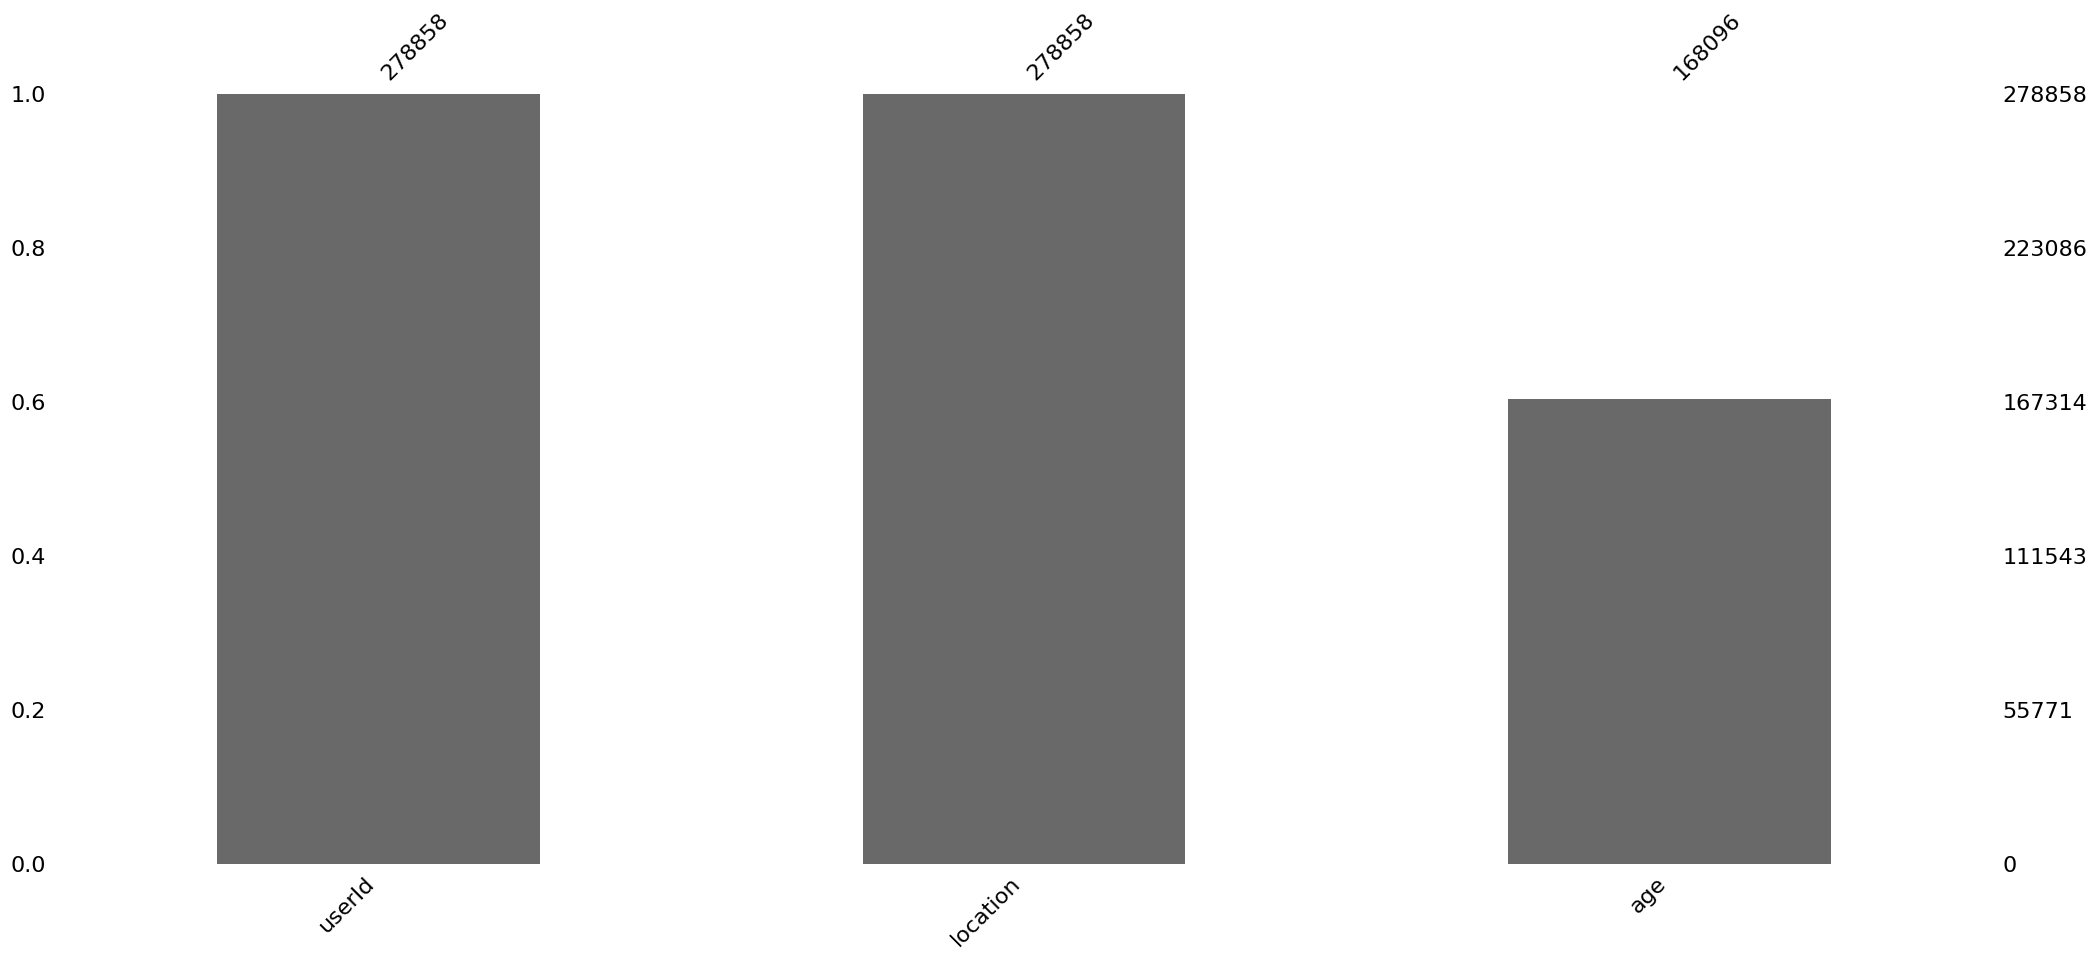

In [ ]:
msno.bar(df)

As shown below, We have many missing values in ```age``` column; So it's time to preprocess it:

- Convert `age` data type to `float`.
- Set the values of ages fewer than 5 to `np.nan`.
- Set the values of ages greater than 110 to `np.nan`.

In [ ]:
# GRADED CELL

df['age'] = df['age'].astype(float)
df.loc[df['age'] < 5, 'age'] = np.nan
df.loc[df['age'] > 110, 'age'] = np.nan

### END CODE HERE ###

In [ ]:
assert len(df.loc[df.age < 5,'age']) == 0
assert len(df.loc[df.age > 110,'age']) == 0

For imputing the missing values of `age` column, we use a normal distribution which its center is the mean of ages, its scale is the standard deviation of ages and its size will equal to the count of missing values in `age` column.



In [ ]:
temp_age_series = pd.Series(np.random.normal(
    loc=df.age.mean(),
    scale=df.age.std(),
    size=df.userId[df.age.isna()].count()
  ))
print("Statistics of values in \'users.age\'\n",df.age.describe(),"\n")
print("Statistics of values we are going to use to fill NaN \n",temp_age_series.describe(),"\n")
print("Negative values in \'temp_age_seires\':", temp_age_series[temp_age_series<0].count(),"\n")

Statistics of values in 'users.age'
 count    167118.000000
mean         34.858244
std          13.901748
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         110.000000
Name: age, dtype: float64 

Statistics of values we are going to use to fill NaN 
 count    111740.000000
mean         34.856620
std          13.849360
min         -25.425903
25%          25.516097
50%          34.851592
75%          44.174619
max          98.028318
dtype: float64 

Negative values in 'temp_age_seires': 665 



As we can see the distribution does not change a lot. There are some negative values thought. However, we can ignore them and use an absolute version of the distribution for imputation.



1.   Take the absolute values of `temp_age_series`.

In [ ]:
# GRADED CELL
pos_age_series = temp_age_series.abs()
### END CODE HERE ###

2.   Sort users dataframe so as NaN values in age to be first and reset index to match with index of `pos_age_series`.
3. Use `fillna` method for imputation.

In [ ]:
# GRADED CELL

users_sorted = df.sort_values('age', na_position='first').reset_index(drop=True)
users_sorted['age'] = users_sorted['age'].fillna(pos_age_series)

### END CODE HERE ###

4. Replace values fewer than  5 with the mean().
5. Round age values and convert them to `int`.
6. Sort users based on `userId` so as to be the same as before.

In [ ]:
# GRADED CELL

df['age'] = df['age'].where(df['age'] >= 5, df['age'].mean())
df['age'] = df['age'].round().astype(int)
users_sorted = df.sort_values('userId').reset_index(drop=True)

### END CODE HERE ###

Now it's time for visualiztion. Let's see what we did on ages:

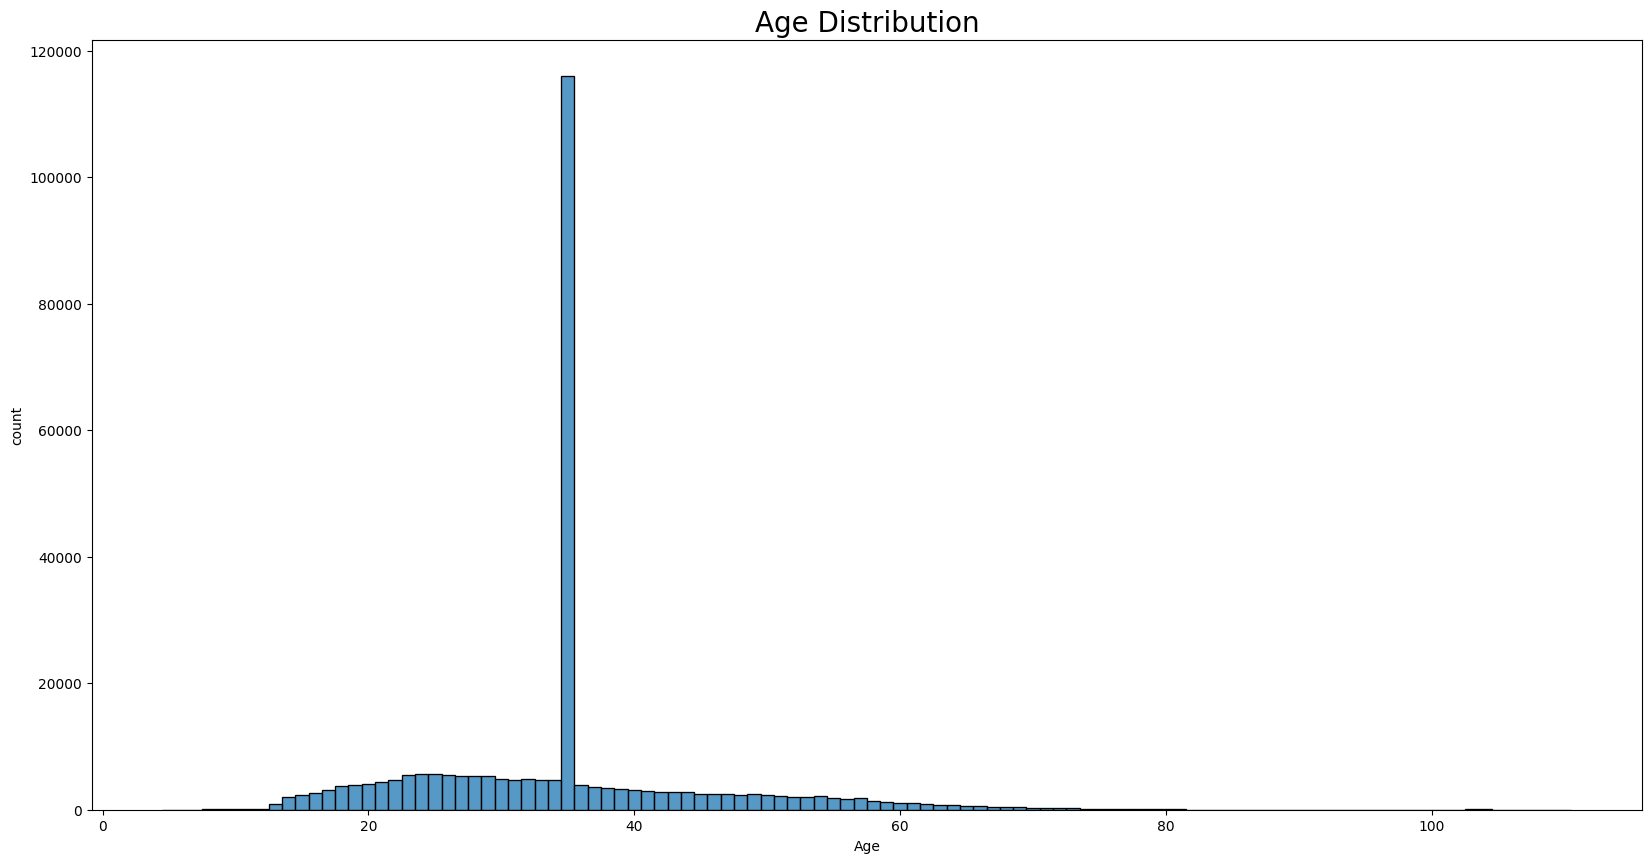

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df['age'], discrete = True)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

After ages, now we'll work on `location` column.

In [ ]:
df.head()

,userId,age,city,state,country
0,1,35,"nyc,",new,"york, usa"
1,2,18,"stockton,","california,",usa
2,3,35,"moscow,",yukon,"territory, russia"
3,4,17,"porto,","v.n.gaia,",portugal
4,5,35,"farnborough,","hants,",united kingdom




```
# This is formatted as code
```

The information of this column is so messy and wasted. What should we do?

1. Split this column into three new columns: `city`, `state` and `country`.

In [ ]:
# GRADED CELL

df[['city', 'state', 'country']] = df['location'].str.split(' ', n=2, expand=True)

### END CODE HERE ###

2. Add these three columns into `users` dataframe and remove `location` column.

In [ ]:
# GRADED CELL

df = df.drop('location', axis=1)

### END CODE HERE ###

3. Some rows have `state` column with `,` value. Change their value into `other`.
4. Some rows have `state` column with `""`, `n.a`, `*` and `\\n/a\\` values. Change their values into `n/a`.
5. Fill other possible NaN values of `state` column with `other` .

In [ ]:
# GRADED CELL

df.loc[df['state'] == ',', 'state'] = 'other'
df.loc[df['state'].isin(['""', 'n.a', '*', '\\n/a\\']), 'state'] = 'n/a'
df['state'].fillna('other', inplace=True)

### END CODE HERE ###

6. Some rows have `country` column with `,` value. Change their value into `other`.
7. Fill other possible NaN values of `stateCOUNTRY` column with `n/a`.

In [ ]:
# GRADED CELL

df.loc[df['country'] == ',', 'country'] = 'other'
df['country'].fillna('n/a', inplace=True)

### END CODE HERE ###

*Finally*, change the data type of two `age` and `userId` columns to `int`.

In [ ]:
# GRADED CELL

df['age'] = df['age'].astype(int)
df['userId'] = df['userId'].astype(int)

### END CODE HERE ###

Now we want to have an interactive visualization. For that, we need to reformat contry names w.r.t the following functions:

In [ ]:
def get_alpha3(col):
    try:
        iso_3 =  country_name_to_country_alpha3(col, cn_name_format="lower")
    except:
        iso_3 = 'Unknown'
    return iso_3

def get_name(col):
    try:
        name =  country_alpha2_to_country_name(country_alpha3_to_country_alpha2(col))
    except:
        name = 'Unknown'
    return name

We copy the dataframe to avoid unexpected overwritten results on the main dataframe. Then:

1. Apply `get_alpha3` function to `country` column of the dataframe.
2. Apply `get_name` function to `country` column of the dataframe.

In [ ]:
users_copy = df.copy()

In [ ]:
# GRADED CELL

users_copy['alpha_3'] = ''
users_copy.loc[users_copy.country == 'usa', 'alpha_3'] = 'USA'
users_copy['country'] = 'Unknown'

### END CODE HERE ###

In [ ]:
users_copy.head()

,userId,age,city,state,country,alpha_3
0,1,35,"nyc,",new,Unknown,
1,2,18,"stockton,","california,",Unknown,USA
2,3,35,"moscow,",yukon,Unknown,
3,4,17,"porto,","v.n.gaia,",Unknown,
4,5,35,"farnborough,","hants,",Unknown,


Now:

1. Group the `users_copy` dataframe by `country` and `alpha_3` columns, aggregate `alpha_3` column for `count` aggregate function(consider `Users` as its name).
2. Reset indices of previous step result.

In [ ]:
# GRADED CELL

users_map = users_copy.groupby(['country', 'alpha_3']).agg({'alpha_3': 'count'}).rename(columns={'alpha_3': 'Users'})
users_map.reset_index(inplace=True)
users_map['Users(log)'] = np.log10(users_map["Users"])
### END CODE HERE ###

In [ ]:
users_map.head()

,country,alpha_3,Users,Users(log)
0,Unknown,,192186,5.283722
1,Unknown,USA,86672,4.937879


In [ ]:
fig = px.choropleth(users_map, locations="alpha_3",
                    color='Users(log)',
                    hover_name="country",
                    hover_data=["Users"],
                    color_continuous_scale='Cividis')
fig.update_layout(title_text="Unique Users")
fig.update_layout(coloraxis_colorbar=dict(title='Users', tickprefix='1.e'))
fig.show()

[link text](https://)Finally, save the `users` dataframe with `{FName_LName}_users_clean.csv` pattern(Don't add index column to output file).

In [ ]:
# GRADED CELL

df.to_csv('{PandasTask}_users_clean.csv', index=False)

### END CODE HERE ###